# Análise de Dados do E-commerce Olist com SQL e Python

Olá! meu nome é Matheus Lourenço

Neste projeto, exploro como o SQL pode ser usado de forma eficiente para análise de dados, enquanto o Python entra em cena apenas para visualização e storytelling.

O conjunto de dados utilizado vem da Olist (https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce), uma plataforma brasileira de e-commerce que conecta pequenos lojistas a grandes marketplaces. O dataset inclui mais de 99 mil pedidos realizados entre 2016 e 2018, oferecendo uma base rica para descobrir padrões de vendas, comportamento do cliente e eficiência logística.

Os arquivos CSV originais foram importados para um banco de dados SQLite, onde realizei todo o processo de limpeza, transformação e análise diretamente em SQL. Em seguida, usei Python para criar visualizações que traduzem os resultados em insights visuais e estratégicos.

## Conectando ao Banco de Dados

O SQLite é uma opção bem prática.
Ele vai armazenar todo o banco em um único arquivo e não precisa de servidor ativo em segundo plano.
Usando a biblioteca sqlite3, é possível acessar e consultar os dados diretamente pelo Python.

In [2]:
import pandas as pd
import sqlite3
import os

# Conectar/criar o banco
conn = sqlite3.connect('/content/olist.sqlite')

# Lista de CSVs e nomes das tabelas
csv_files = {
    "customers": "olist_customers_dataset.csv",
    "geolocation": "olist_geolocation_dataset.csv",
    "order_items": "olist_order_items_dataset.csv",
    "order_payments": "olist_order_payments_dataset.csv",
    "order_reviews": "olist_order_reviews_dataset.csv",
    "orders": "olist_orders_dataset.csv",
    "products": "olist_products_dataset.csv",
    "sellers": "olist_sellers_dataset.csv",
    "category_translation": "product_category_name_translation.csv"
}

# Carregando cada CSV e salvar no banco SQLite
for table_name, file_name in csv_files.items():
    df = pd.read_csv(f"/content/{file_name}")
    df.to_sql(table_name, conn, if_exists='replace', index=False)
    print(f"Tabela '{table_name}' criada com {len(df)} registros.")

# Confirmando as tabelas criadas
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("\nTabelas disponíveis no banco:")
print(tables)



Tabela 'customers' criada com 99441 registros.
Tabela 'geolocation' criada com 1000163 registros.
Tabela 'order_items' criada com 112650 registros.
Tabela 'order_payments' criada com 103886 registros.
Tabela 'order_reviews' criada com 99224 registros.
Tabela 'orders' criada com 99441 registros.
Tabela 'products' criada com 32951 registros.
Tabela 'sellers' criada com 3095 registros.
Tabela 'category_translation' criada com 71 registros.

Tabelas disponíveis no banco:
                   name
0             customers
1           geolocation
2           order_items
3        order_payments
4         order_reviews
5                orders
6              products
7               sellers
8  category_translation


Para consultar o banco de dados, basta escrever a query SQL como uma string e passá-la para o 'pandas.read_sql_query', junto com a conexão do banco.
O resultado é retornado em um DataFrame do pandas, facilitando a análise e visualização dos dados.

Ao longo deste notebook, utilizaremos a seguinte função para explorar as tabelas do banco de dados de forma simples e direta:

In [3]:
import pandas as pd

def view_table(table, limit=5):
    query = f"""
        SELECT *
        FROM {table}
        LIMIT {limit}
    """
    return pd.read_sql_query(query, conn)

# visualizar as 5 primeiras linhas da tabela 'orders'
view_table('orders')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# Número de Pedidos
A tabela 'orders' reúne os IDs de pedidos e clientes, além do status de entrega, que pode ser “delivered” ou outros estados anteriores à entrega.

In [4]:
# Tabela de pedidos, mostrando as 3 primeiras colunas
view_table('orders', 5).iloc[:, :3]

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered


As próximas colunas mostram os horários das mudanças de status do pedido e, por último, a data estimada de entrega

In [5]:
# resto das colunas
view_table('orders', 5).iloc[:, 3:]

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
# Contagem de pedidos por dia
orders_per_day = """
SELECT
    DATE(order_purchase_timestamp) AS day,
    COUNT(*) AS order_count
FROM orders
GROUP BY day
ORDER BY day
"""

df = pd.read_sql_query(orders_per_day, conn)
df.head(5)

,day,order_count
0,2016-09-04,1
1,2016-09-05,1
2,2016-09-13,1
3,2016-09-15,1
4,2016-10-02,1


No resultado anterior, podemos ver que os primeiros dias possuem poucos pedidos. Vamos usar o Matplotlib para visualizar a frequência de pedidos por dia:

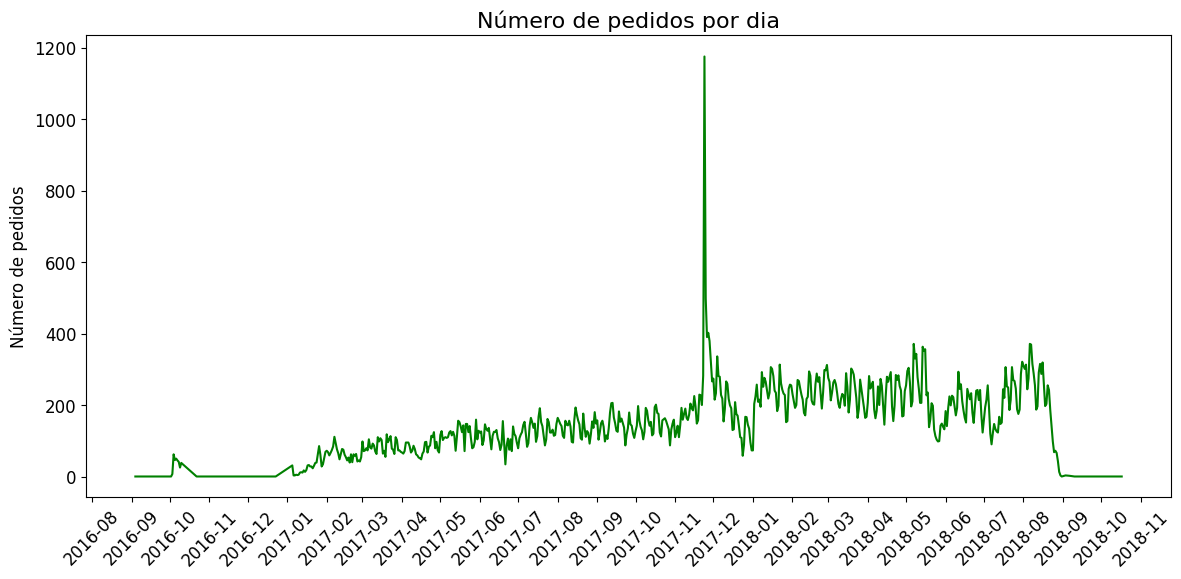

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Aumento do tamanho da fonte
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16

# Plotando o gráfico de linha
plt.figure(figsize=(14, 6))
plt.plot(pd.to_datetime(df['day']), df['order_count'], color='green')
plt.ylabel('Número de pedidos')
plt.title('Número de pedidos por dia')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.show()

Pode-se perceber um pico de pedidos próximo ao Natal, especialmente em 24 de dezembro. Também há um crescimento constante nas vendas ao longo do tempo, refletindo a expansão da Olist. Como o início e o fim do período têm poucos dados, essas datas serão ignoradas nas próximas análises.

Agora, vamos investigar quando os pedidos acontecem — por dia da semana e hora do dia — criando um mapa de calor que mostra o volume de pedidos ao longo da semana e das horas. Para isso, extrairemos o dia da semana e a hora do pedido usando a função STRFTIME.

In [8]:
order_day_hour = """
SELECT
    -- dia da semana abreviado
    CASE STRFTIME('%w', order_purchase_timestamp)
        WHEN '1' THEN 'Mon'
        WHEN '2' THEN 'Tue'
        WHEN '3' THEN 'Wed'
        WHEN '4' THEN 'Thu'
        WHEN '5' THEN 'Fri'
        WHEN '6' THEN 'Sat'
        WHEN '0' THEN 'Sun'
        END AS day_of_week_name,
    -- dia da semana como um inteiro (Sunday=7)
    CAST(STRFTIME('%w', order_purchase_timestamp) AS INTEGER) AS day_of_week_int,
    -- Hour of the day (0-24)
    CAST(STRFTIME("%H", order_purchase_timestamp) AS INTEGER) AS hour
FROM orders
"""

pd.read_sql_query(order_day_hour, conn)

,day_of_week_name,day_of_week_int,hour
0,Mon,1,10
1,Tue,2,20
2,Wed,3,8
3,Sat,6,19
4,Tue,2,21
...,...,...,...
99436,Thu,4,9
99437,Tue,2,12
99438,Sun,0,14
99439,Mon,1,21


Usamos uma 'list comprehension' em Python para gerar automaticamente a contagem de pedidos por hora, sem precisar escrever 24 linhas manuais. A consulta anterior é reaproveitada como uma subconsulta temporária para facilitar a análise.

In [9]:
count_orders_per_hour = ',\n    '.join([
    f'COUNT(CASE WHEN hour = {i} THEN 1 END) AS "{i}"' \
    for i in range(24)
])

orders_per_day_of_the_week_and_hour = f"""
WITH OrderDayHour AS (
    {order_day_hour}
)
SELECT
    day_of_week_name,
    {count_orders_per_hour}
FROM OrderDayHour
GROUP BY day_of_week_int
ORDER BY day_of_week_int
"""

In [10]:
# SQL query sem uma subconsulta temporária
print(orders_per_day_of_the_week_and_hour[591:])

SELECT
    day_of_week_name,
    COUNT(CASE WHEN hour = 0 THEN 1 END) AS "0",
    COUNT(CASE WHEN hour = 1 THEN 1 END) AS "1",
    COUNT(CASE WHEN hour = 2 THEN 1 END) AS "2",
    COUNT(CASE WHEN hour = 3 THEN 1 END) AS "3",
    COUNT(CASE WHEN hour = 4 THEN 1 END) AS "4",
    COUNT(CASE WHEN hour = 5 THEN 1 END) AS "5",
    COUNT(CASE WHEN hour = 6 THEN 1 END) AS "6",
    COUNT(CASE WHEN hour = 7 THEN 1 END) AS "7",
    COUNT(CASE WHEN hour = 8 THEN 1 END) AS "8",
    COUNT(CASE WHEN hour = 9 THEN 1 END) AS "9",
    COUNT(CASE WHEN hour = 10 THEN 1 END) AS "10",
    COUNT(CASE WHEN hour = 11 THEN 1 END) AS "11",
    COUNT(CASE WHEN hour = 12 THEN 1 END) AS "12",
    COUNT(CASE WHEN hour = 13 THEN 1 END) AS "13",
    COUNT(CASE WHEN hour = 14 THEN 1 END) AS "14",
    COUNT(CASE WHEN hour = 15 THEN 1 END) AS "15",
    COUNT(CASE WHEN hour = 16 THEN 1 END) AS "16",
    COUNT(CASE WHEN hour = 17 THEN 1 END) AS "17",
    COUNT(CASE WHEN hour = 18 THEN 1 END) AS "18",
    COUNT(CASE WHEN ho

Depois de executar a consulta, precisamos apenas definir a coluna 'day_of_the_week_name' como o índice do dataframe para obter a matriz necessária para construir o mapa de calor:

In [11]:
df = pd.read_sql_query(orders_per_day_of_the_week_and_hour, conn)
df = df.set_index('day_of_week_name')
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week_name,,,,,,,,,,,,,,,,,,,,,
Sun,267,141,69,44,27,27,34,105,205,349,...,684,716,712,797,895,899,967,889,873,607
Mon,328,134,66,36,21,22,69,160,479,783,...,1096,1079,1094,992,928,945,1027,1118,991,717
Tue,306,158,80,28,29,24,71,223,522,864,...,1124,1047,1081,967,877,924,988,1027,965,692
Wed,397,179,81,33,33,27,93,211,517,829,...,1050,983,1040,967,852,848,904,963,878,615
Thu,355,167,75,39,31,28,85,220,502,758,...,977,928,1077,909,784,826,839,840,857,551
Fri,426,216,72,49,40,36,97,206,493,768,...,961,979,974,817,723,784,738,726,702,512
Sat,315,175,67,43,25,24,53,106,249,434,...,677,722,697,701,710,756,730,654,550,429


Podemos usar a biblioteca do python 'seaborn' para criar o mapa de calor:

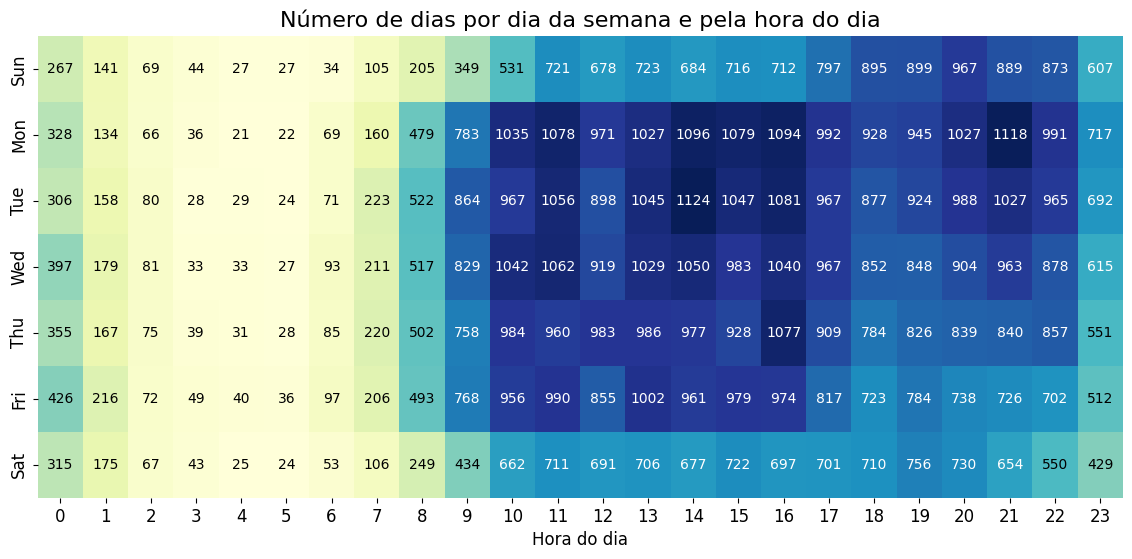

In [12]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(df, cmap='YlGnBu', cbar=False)
media_orders = df.mean().mean()
for i in range(len(df)):
    for j in range(len(df.columns)):
        text_color = 'white' if df.iloc[i, j] > media_orders else 'black'
        ax.text(j+0.5, i+0.5, int(df.iloc[i, j]),
            color=text_color, fontsize=10, ha="center", va="center")
plt.title("Número de dias por dia da semana e pela hora do dia")
plt.xlabel("Hora do dia")
plt.ylabel("")
plt.show()

Pode-se observar que a maioria dos pedidos foi feita em dias de semana, entre *10h e 16h*, com uma leve queda por volta do meio-dia (horário de almoço). Há também um aumento de pedidos à noite, por volta das 21h, de domingo a quinta-feira.

O sábado é o dia com menos pedidos, embora ainda movimentado.
Já o horário com menor atividade é entre 3h e 5h da manhã, mas ainda ocorrem algumas compras nesse período

Agora que analisamos a distribuição dos pedidos ao longo do tempo, vamos observar a distribuição geográfica.
A tabela 'customers' contém o prefixo do CEP, cidade e estado de cada cliente.
Vale notar que existem dois identificadores: 'customer_id '(relacionado ao pedido) e 'customer_unique_id', que representa o cliente único.

In [13]:
view_table('customers', 5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## Quais são as cidades com maior número de pedidos no conjunto de dados?


Vamos criar uma query que retorna o top 10 dessas cidades. Para isso, faremos um JOIN entre as tabelas 'orders' e 'customers'.

In [14]:
orders_per_city = """
SELECT
    customer_city AS customer_city,
    UPPER(customer_city) AS city,
    COUNT(orders.order_id) AS city_order_count
FROM
    customers
    JOIN orders USING (customer_id)
GROUP BY customer_city
ORDER BY city_order_count DESC
LIMIT 10
"""

pd.read_sql_query(orders_per_city, conn)

,customer_city,city,city_order_count
0,sao paulo,SAO PAULO,15540
1,rio de janeiro,RIO DE JANEIRO,6882
2,belo horizonte,BELO HORIZONTE,2773
3,brasilia,BRASILIA,2131
4,curitiba,CURITIBA,1521
5,campinas,CAMPINAS,1444
6,porto alegre,PORTO ALEGRE,1379
7,salvador,SALVADOR,1245
8,guarulhos,GUARULHOS,1189
9,sao bernardo do campo,SAO BERNARDO DO CAMPO,938


Vamos visualizar essas cidades em um gráfico de barras horizontais com o 'kind=barh'.
Como a função barh do Matplotlib plota de baixo para cima, precisamos inverter a ordem dos resultados. Para isso, usaremos a query anterior como uma subquery no SQL.

In [15]:
orders_per_city_reversed = f"""
SELECT *
FROM ({orders_per_city})
ORDER BY city_order_count
"""

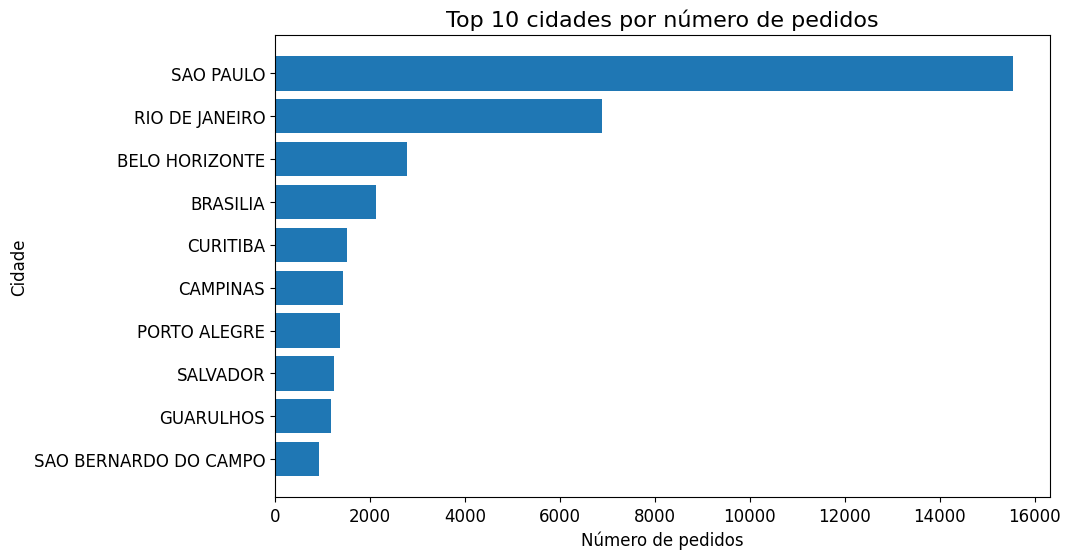

In [16]:
top10_cidades = pd.read_sql_query(orders_per_city_reversed, conn)

plt.figure(figsize=(10, 6))
plt.barh(top10_cidades['city'], top10_cidades['city_order_count'])
plt.xlabel('Número de pedidos')
plt.ylabel('Cidade')
plt.title('Top 10 cidades por número de pedidos')
plt.show()

Podemos ver que São Paulo domina amplamente, com aproximadamente o dobro de pedidos em relação ao segundo lugar, Rio de Janeiro.
As demais cidades — Belo Horizonte, Brasília, Curitiba e Campinas — têm volumes consideravelmente menores, mas ainda expressivos.
O padrão indica forte concentração de pedidos nas grandes capitais e regiões metropolitanas, o que reflete maior densidade populacional e poder de compra

<br>

# Preço dos pedidos

- Qual é o valor médio de um pedido?
- A Olist lida com transações de itens de valor muito baixo ou muito alto?

vamos dar uma olhada na tabela order_items:
Ela contém vários IDs, além do preço (em reais R$) e do custo de envio dos itens de cada pedido

In [17]:
# Tabela order_items, primeiras 4 colunas
view_table('order_items', 5).iloc[:, :4]

,order_id,order_item_id,product_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87


In [18]:
# Tabela order_items, 2 últimas colunas
view_table('order_items', 5).iloc[:, 5:]

,price,freight_value
0,58.90,13.29
1,239.90,19.93
2,199.00,17.87
3,12.99,12.79
4,199.90,18.14


Qual a média do preço dos pedidos, considerando os custos de produtos e o frete pra envio? vamos analisar os pedidos com menores e maiores custos

In [19]:
order_price_stats = """
SELECT
    MIN(order_price) AS min_order_price,
    ROUND(AVG(order_price), 2) AS avg_order_price,
    MAX(order_price) AS max_order_price
FROM (
    SELECT
        orders.order_id,
        SUM(order_items.price + order_items.freight_value) AS order_price
    FROM orders
        JOIN order_items USING (order_id)
    GROUP BY orders.order_id
)
"""

pd.read_sql_query(order_price_stats, conn)

,min_order_price,avg_order_price,max_order_price
0,9.59,160.58,13664.08


O preço médio dos pedidos é R$160,58

O pedido mais caro chega a R$13.664,08, quase 100x acima da média — provavelmente uma distribuição com cauda à direita

Vamos ver a variação dos preços, separando o valor dos produtos e o frete.

In [20]:
order_product_and_shipping_costs = """
SELECT
    orders.order_id,
    SUM(price) AS product_cost,
    SUM(freight_value) AS shipping_cost
FROM
    orders
    JOIN order_items USING (order_id)
WHERE order_status = 'delivered'
GROUP BY orders.order_id
"""

df = pd.read_sql_query(order_product_and_shipping_costs, conn)
df

,order_id,product_cost,shipping_cost
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,299.99,43.41
96474,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
96475,fffce4705a9662cd70adb13d4a31832d,99.90,16.95
96476,fffe18544ffabc95dfada21779c9644f,55.99,8.72


Vamos plotar um histograma para cada tipo de custo.

Como os valores variam bastante, mas a maioria dos pedidos tem custo baixo, vamos limitar o eixo X para 500 reais (produtos) e 80 reais (frete), podendo ver a distribuição dos valores mais comuns.

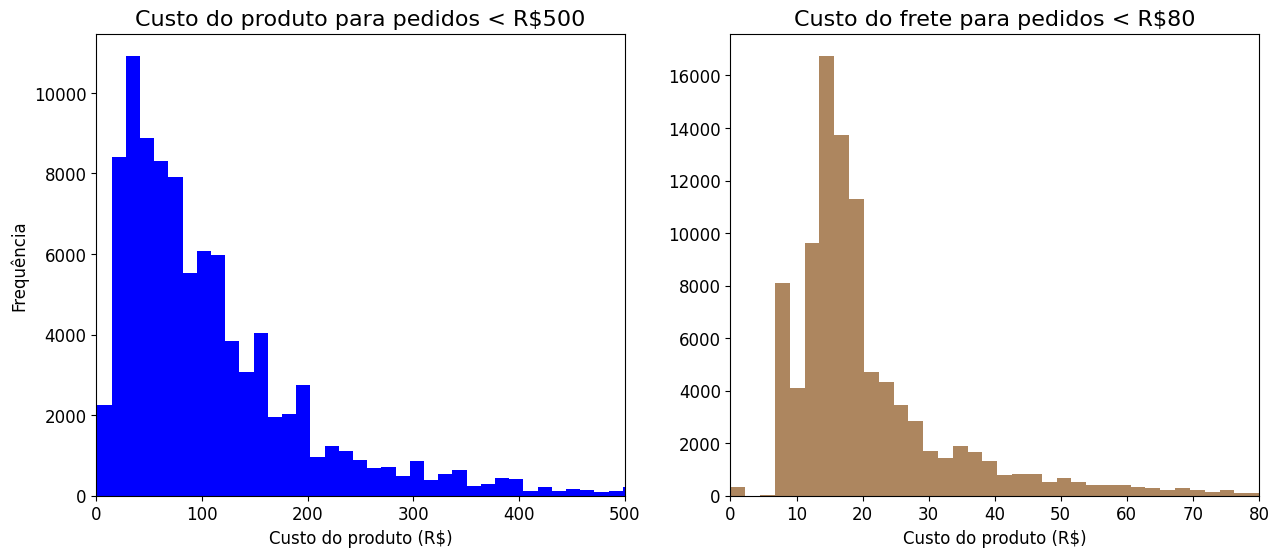

In [21]:
plt.figure(figsize=(15, 6))
# Histograma para o custo total de produtos
plt.subplot(1, 2, 1)
plt.hist(df['product_cost'], bins=1000, color='blue')
plt.title('Custo do produto para pedidos < R$500')
plt.xlabel('Custo do produto (R$)')
plt.ylabel('Frequência')
plt.xlim([0, 500])
# Histograma para o custo total do frete
plt.subplot(1, 2, 2)
plt.hist(df['shipping_cost'], bins=800, color='#ad865f')
plt.title('Custo do frete para pedidos < R$80')
plt.xlabel('Custo do produto (R$)')
plt.xlim([0, 80])
plt.show()

O valor dos produtos varia bastante, mas a maioria dos pedidos custa menos de R$ 200.

O frete geralmente fica entre 7 a 20 reais, podendo chegar a valores bem mais altos em alguns casos.

# Categorias de produtos

vamos observar a tabela 'products', que possui 9 colunas. Vamos analistar a categoria e o peso do produto

In [22]:
view_table('products', 5).iloc[:, [0, 1, 5]]

,product_id,product_category_name,product_weight_g
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0


In [23]:
query = """
SELECT DISTINCT product_category_name
FROM products
ORDER BY product_category_name;
"""

df = pd.read_sql_query(query, conn)
print(df)


        product_category_name
0                        None
1   agro_industria_e_comercio
2                   alimentos
3           alimentos_bebidas
4                       artes
..                        ...
69    sinalizacao_e_seguranca
70   tablets_impressao_imagem
71                  telefonia
72             telefonia_fixa
73      utilidades_domesticas

[74 rows x 1 columns]


São 73 categorias únicas de produtos. Vamos usar um treemap para mostrar as vendas relativas de cada uma. Como 71 é muito, selecionaremos as 18 principais e agruparemos o resto em “Outras categorias”.

Primeiro, vamos calcular o total de vendas por categoria

In [24]:
ranked_categories = """
SELECT
    product_category_name AS categoria,
    SUM(price) AS vendas,
    RANK() OVER (ORDER BY SUM(price) DESC) AS posicao
FROM order_items
    JOIN orders USING (order_id)
    JOIN products USING (product_id)
WHERE order_status = 'delivered'
GROUP BY product_category_name
"""

pd.read_sql_query(ranked_categories, conn)

,categoria,vendas,posicao
0,beleza_saude,1233131.72,1
1,relogios_presentes,1166176.98,2
2,cama_mesa_banho,1023434.76,3
3,esporte_lazer,954852.55,4
4,informatica_acessorios,888724.61,5
...,...,...,...
69,flores,1110.04,70
70,casa_conforto_2,760.27,71
71,cds_dvds_musicais,730.00,72
72,fashion_roupa_infanto_juvenil,519.95,73


In [25]:
category_sales_summary = f"""
WITH RankedCategories AS (
    {ranked_categories}
)
-- Top 18 categorias por vendas
SELECT
    categoria,
    vendas
FROM RankedCategories
WHERE posicao <= 18

UNION ALL

-- Outras categorias agrupadas
SELECT
    'Outras categorias' AS categoria,
    SUM(vendas) AS vendas
FROM RankedCategories
WHERE posicao > 18
"""

df = pd.read_sql_query(category_sales_summary, conn)
df

,categoria,vendas
0,beleza_saude,1233131.72
1,relogios_presentes,1166176.98
2,cama_mesa_banho,1023434.76
3,esporte_lazer,954852.55
4,informatica_acessorios,888724.61
5,moveis_decoracao,711927.69
6,utilidades_domesticas,615628.69
7,cool_stuff,610204.10
8,automotivo,578966.65
9,brinquedos,471286.48


Vamos visualizar esses dados em um 'treemap' usando o a biblioteca 'Squarify':

In [26]:
!pip install squarify

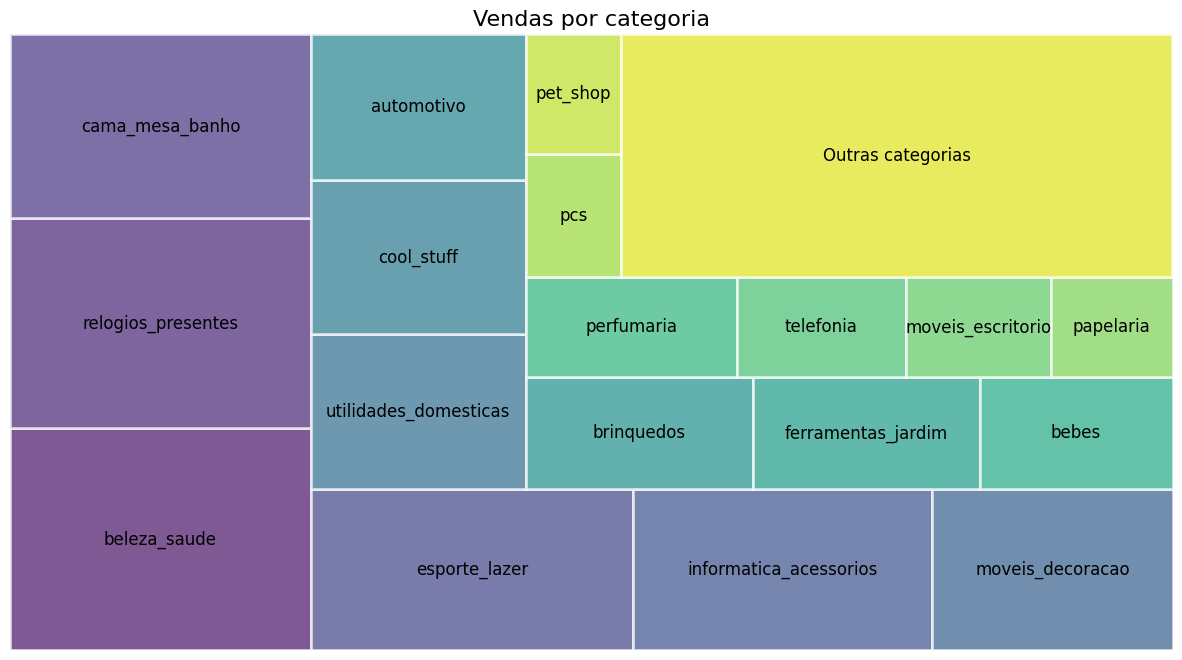

In [27]:
import squarify

plt.figure(figsize=(15, 8))
plt.title('Vendas por categoria')
color = sns.color_palette("viridis", len(df))
squarify.plot(sizes=df['vendas'], label=df['categoria'],
              alpha=0.7, color=color, edgecolor="white", linewidth=2)
plt.axis('off')
plt.show()

Podemos entender melhor os tipos de produtos analisando a distribuição do peso por categoria em boxplots.
Usaremos a lista das 18 principais categorias do dataframe anterior.

In [28]:
top_18_categorias = tuple(categoria for categoria in df['categoria'] if categoria != 'Outras categorias')
print(top_18_categorias)

('beleza_saude', 'relogios_presentes', 'cama_mesa_banho', 'esporte_lazer', 'informatica_acessorios', 'moveis_decoracao', 'utilidades_domesticas', 'cool_stuff', 'automotivo', 'brinquedos', 'ferramentas_jardim', 'bebes', 'perfumaria', 'telefonia', 'moveis_escritorio', 'papelaria', 'pcs', 'pet_shop')


Como o SQLite não possui função de mediana, ordenaremos os produtos por categoria usando números de linha e contaremos quantos produtos há em cada uma, salvando o resultado para gerar o gráfico.

In [29]:
categorias_ordenadas = f"""
SELECT
    product_weight_g AS peso,
    product_category_name AS categoria,
    ROW_NUMBER() OVER(PARTITION BY product_category_name ORDER BY product_weight_g) AS categoria_linha,
    COUNT(*) OVER(PARTITION BY product_category_name) AS total_produtos
FROM products
JOIN order_items USING (product_id)
WHERE product_category_name IN {top_18_categorias}
"""

df = pd.read_sql_query(categorias_ordenadas, conn)
df

,peso,categoria,categoria_linha,total_produtos
0,50.0,automotivo,1,4235
1,50.0,automotivo,2,4235
2,50.0,automotivo,3,4235
3,50.0,automotivo,4,4235
4,50.0,automotivo,5,4235
...,...,...,...,...
92419,30000.0,utilidades_domesticas,6960,6964
92420,30000.0,utilidades_domesticas,6961,6964
92421,30000.0,utilidades_domesticas,6962,6964
92422,30000.0,utilidades_domesticas,6963,6964


Podemos usar a consulta anterior 'categorias_ordenadas' para calcular a mediana de cada categoria e ordenar pelos valores medianos.

In [30]:
categorias_por_mediana = f"""
WITH CategoriasOrdenadas AS (
    {categorias_ordenadas}
)
SELECT
    categoria,
    AVG(peso) AS mediana_peso
FROM CategoriasOrdenadas
WHERE
    -- Número ímpar de produtos: seleciona a linha do meio
    (total_produtos % 2 = 1 AND categoria_linha = (total_produtos + 1) / 2)
    OR
    -- Número par de produtos: seleciona as duas linhas centrais e calcula a média
    (total_produtos % 2 = 0 AND categoria_linha IN ((total_produtos / 2), (total_produtos / 2 + 1)))
GROUP BY categoria
ORDER BY mediana_peso;
"""

categorias_por_mediana_df = pd.read_sql_query(categorias_por_mediana, conn)
categorias_por_mediana_df



,categoria,mediana_peso
0,telefonia,225.0
1,informatica_acessorios,300.0
2,relogios_presentes,348.0
3,beleza_saude,400.0
4,perfumaria,400.0
5,bebes,700.0
6,esporte_lazer,700.0
7,brinquedos,800.0
8,pet_shop,875.0
9,automotivo,900.0


Agora bora plotar um gráfico com os boxplots.

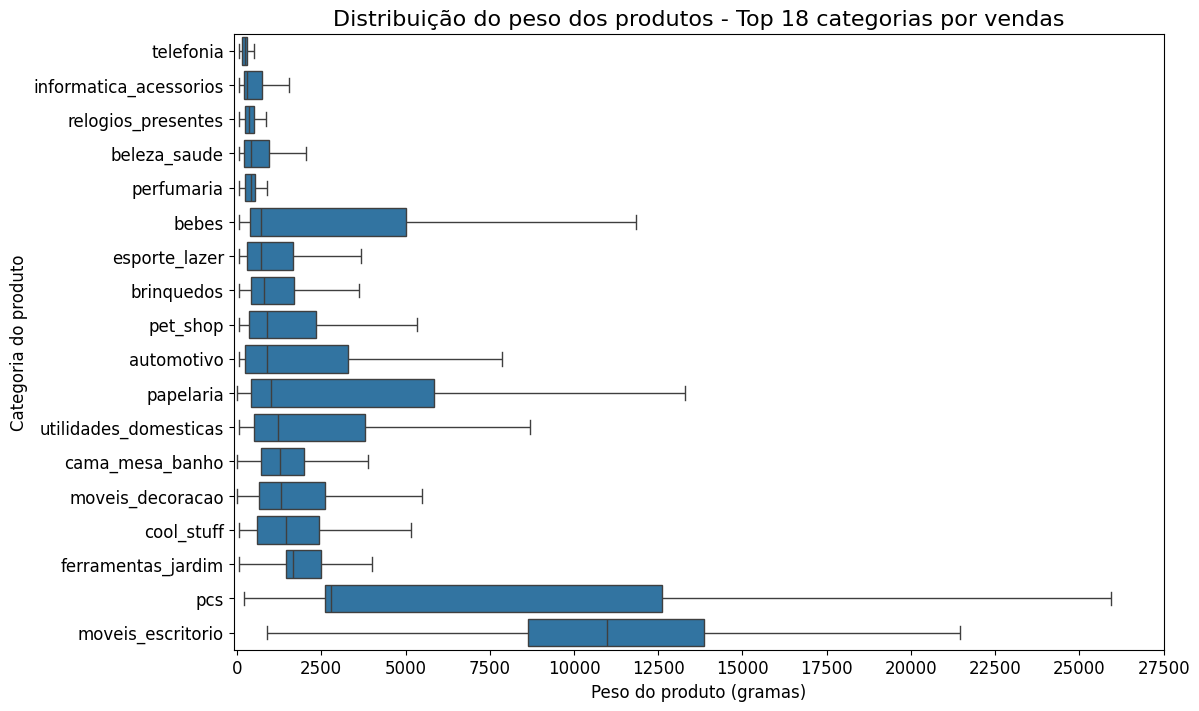

In [31]:
plt.figure(figsize=(12, 8))

# Define a ordem das categorias de acordo com a mediana calculada
ordem = categorias_por_mediana_df['categoria'].tolist()

# Cria o boxplot de peso por categoria
sns.boxplot(
    x='peso',
    y='categoria',
    data=df,
    order=ordem,
    showfliers=False
)

# Customização dos eixos e título
plt.xlabel('Peso do produto (gramas)')
plt.ylabel('Categoria do produto')
plt.title('Distribuição do peso dos produtos - Top 18 categorias por vendas')

# Limites e ticks do eixo X
plt.xlim(-100, 26100)
plt.xticks(ticks=range(0, 30000, 2500))
plt.yticks(fontsize=12)

plt.show()


Podemos ver no topo do gráfico que as categorias telefonia, informática_acessórios, relógios_presentes e beleza_saúde possuem itens leves (geralmente abaixo de 2 kg).
Na parte inferior, pcs e moveis_escritório têm produtos bem mais pesados.

# Evolução mensal das vendas por categoria

Vamos analisar as tendências de vendas de algumas categorias selecionadas:

In [32]:
selected_categories = ('beleza_saude',
    'automotivo',
    'brinquedos',
    'informatica_acessorios',
    'cama_mesa_banho')

Para criar um gráfico de linha com as vendas mensais de cada categoria, precisamos de uma matriz com a soma das vendas, onde as colunas são as categorias e as linhas representam os meses.

In [33]:
monthly_sales_selected_categories = f"""
SELECT
    strftime('%Y-%m', order_purchase_timestamp) AS ano_mes,
    SUM(CASE WHEN product_category_name = 'beleza_saude' THEN price END) AS beleza_saude,
    SUM(CASE WHEN product_category_name = 'automotivo' THEN price END) AS automotivo,
    SUM(CASE WHEN product_category_name = 'brinquedos' THEN price END) AS brinquedos,
    SUM(CASE WHEN product_category_name = 'informatica_acessorios' THEN price END) AS informatica_acessorios,
    SUM(CASE WHEN product_category_name = 'cama_mesa_banho' THEN price END) AS cama_mesa_banho
FROM orders
    JOIN order_items USING (order_id)
    JOIN products USING (product_id)
WHERE order_purchase_timestamp >= '2017-01-01'
    AND product_category_name IN {selected_categories}
GROUP BY ano_mes
"""

df = pd.read_sql_query(monthly_sales_selected_categories, conn)
df = df.set_index('ano_mes')
df


,beleza_saude,automotivo,brinquedos,informatica_acessorios,cama_mesa_banho
ano_mes,,,,,
2017-01,12561.32,5218.53,4814.09,3924.14,3960.16
2017-02,22838.79,13162.40,9403.34,11972.59,16282.73
2017-03,25995.25,14482.07,12429.47,28624.60,25773.02
2017-04,22935.75,15548.17,13039.43,20691.06,24347.69
2017-05,46786.02,18640.03,22626.95,45634.78,33346.45
2017-06,32029.39,31370.69,15476.35,37007.08,35114.81
2017-07,34896.86,14119.74,24511.72,38709.00,63888.75
2017-08,49873.90,20421.11,18126.87,35025.72,57137.23
2017-09,51537.65,14544.67,31399.22,28930.98,52473.20


Há poucos dados antes de 2017-01-01, então ignorei os pedidos feitos antes dessa data. Visualizando a série temporal:

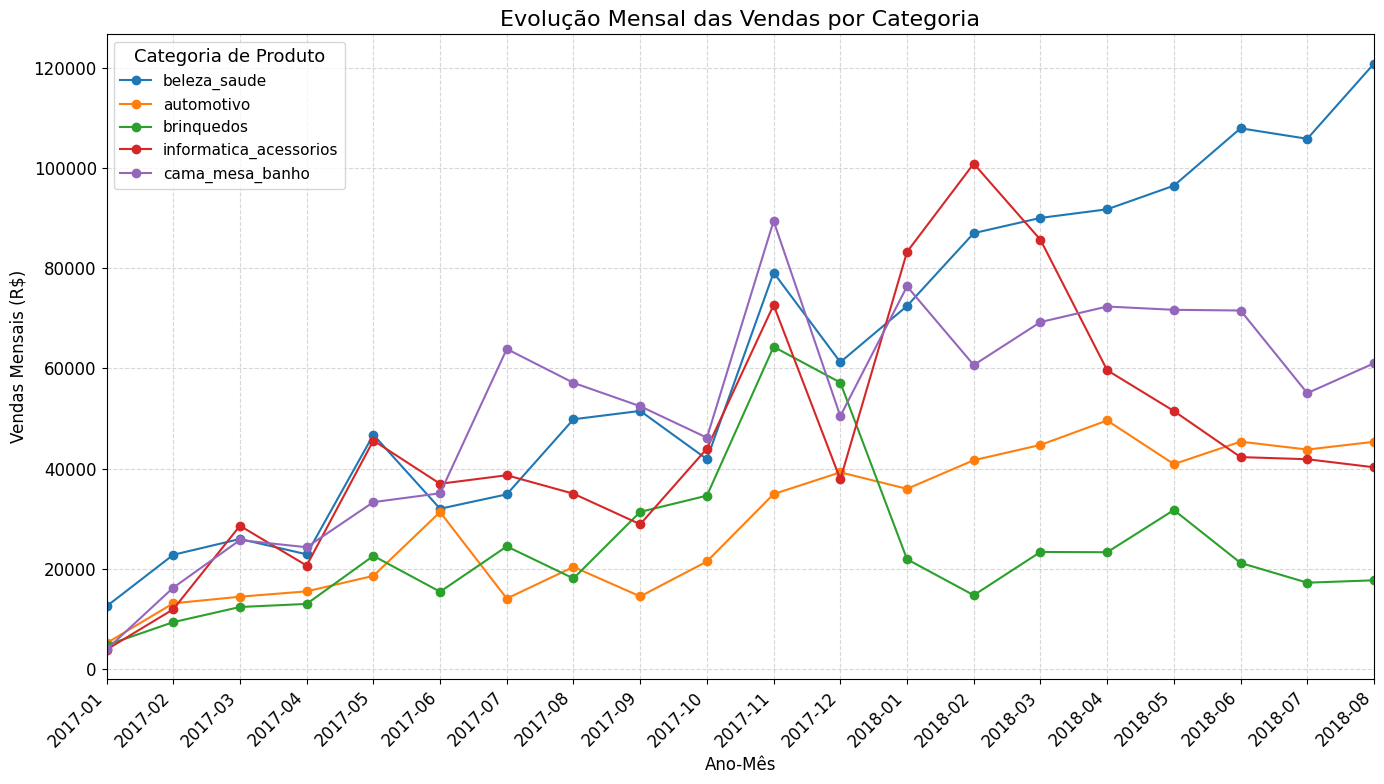

In [34]:
# Converte o índice (ano_mes) para datetime
df.index = pd.to_datetime(df.index, format='%Y-%m')

# Cria figura e eixo
fig, ax = plt.subplots(figsize=(14, 8))

# Plota as linhas
df.plot(ax=ax, marker='o', linestyle='-')

# Ajusta os rótulos do eixo X
ax.set_xticks(df.index)
ax.set_xticklabels(df.index.strftime('%Y-%m'), rotation=45, ha='right')

# Títulos e rótulos
plt.title('Evolução Mensal das Vendas por Categoria', fontsize=16)
plt.xlabel('Ano-Mês', fontsize=12)
plt.ylabel('Vendas Mensais (R$)', fontsize=12)

# Legenda e grid
plt.legend(title='Categoria de Produto', title_fontsize=13, fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)

# Mostra o gráfico
plt.tight_layout()
plt.show()


Beleza e Saúde lidera com crescimento constante e sólido; Automotivo cresce de forma estável e previsível.
Brinquedos tem pico forte no fim do ano, mostrando alta sazonalidade.
Informática sobe até 2018 e depois cai, exigindo revisão de oferta.
Cama, Mesa e Banho oscila bastante, com potencial em datas específicas.

# Entrega dos pedidos

A tabela orders contém vários registros de tempo:

- order_purchase_timestamp – quando o cliente faz o pedido.
- order_approved_at – quando o pedido é aprovado pela Olist.
- order_delivered_carrier_date – quando é enviado para a transportadora.
- order_delivered_customer_date – quando o cliente recebe o pedido.
- order_estimated_delivery_date – previsão de entrega.

Cada um marca uma etapa do processo de envio.
Agora vamos consultar os dados para visualizar o tempo médio de cada etapa nas 10 cidades com mais pedidos.

In [35]:
# Top 10 cidades com mais pedidos
top_cities_query = """
SELECT
    customer_city,
    COUNT(order_id) AS total_pedidos
FROM orders
JOIN customers USING (customer_id)
GROUP BY customer_city
ORDER BY total_pedidos DESC
LIMIT 10
"""

top_cities = pd.read_sql_query(top_cities_query, conn)
top_cities

,customer_city,total_pedidos
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [36]:
order_stage_times_top_10_cities = f"""
SELECT
    UPPER(customer_city) AS city,
    AVG(JULIANDAY(order_approved_at) - JULIANDAY(order_purchase_timestamp)) AS approved,
    AVG(JULIANDAY(order_delivered_carrier_date) - JULIANDAY(order_approved_at)) AS delivered_to_carrier,
    AVG(JULIANDAY(order_delivered_customer_date) - JULIANDAY(order_delivered_carrier_date)) AS delivered_to_customer,
    AVG(JULIANDAY(order_estimated_delivery_date) - JULIANDAY(order_delivered_customer_date)) AS estimated_delivery
FROM orders
JOIN customers USING (customer_id)
WHERE customer_city IN {tuple(top_cities['customer_city'])}
GROUP BY city
ORDER BY approved + delivered_to_carrier + delivered_to_customer DESC
"""

df = pd.read_sql_query(order_stage_times_top_10_cities, conn)
df = df.set_index('city')
df

,approved,delivered_to_carrier,delivered_to_customer,estimated_delivery
city,,,,
SALVADOR,0.498863,2.700868,16.160566,8.755085
PORTO ALEGRE,0.420697,2.809786,12.786769,11.091915
RIO DE JANEIRO,0.383342,2.979133,11.409813,12.504991
BRASILIA,0.432585,2.762064,9.805472,11.333709
BELO HORIZONTE,0.378608,2.848813,7.900486,11.901479
CURITIBA,0.453929,2.690824,7.316206,12.732135
CAMPINAS,0.420262,2.784653,6.611740,8.821432
SAO BERNARDO DO CAMPO,0.349693,2.702651,5.045101,9.799631
SAO PAULO,0.385928,2.726784,4.961921,10.027349


Bora ver em um gráfico de barra o nosso df

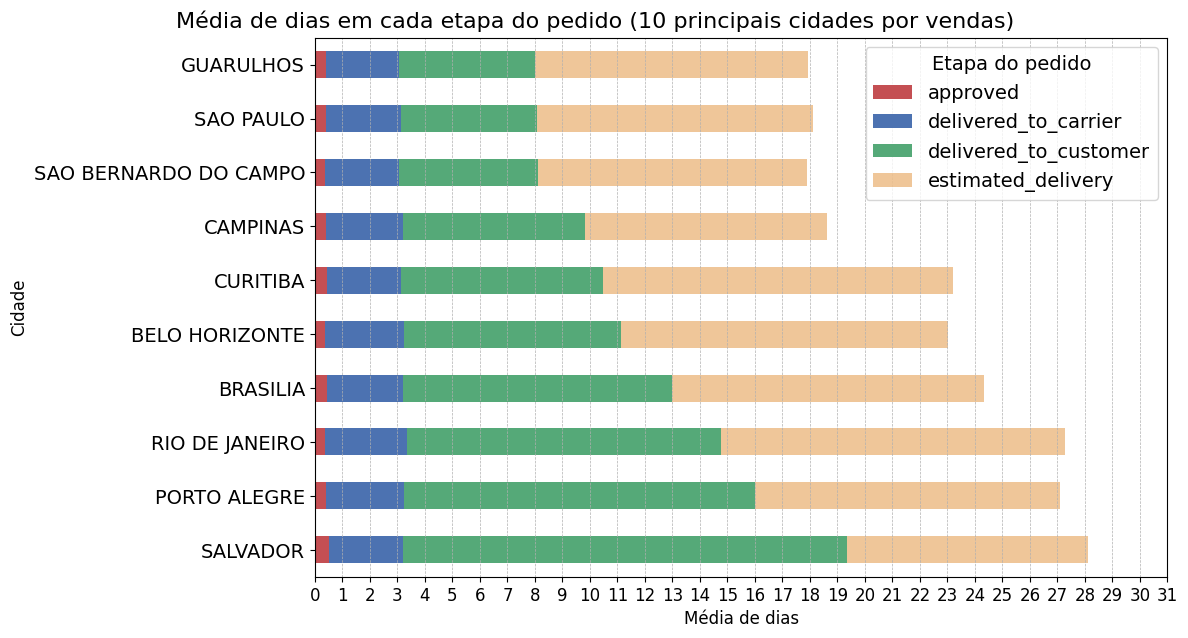

In [37]:
fig, ax = plt.subplots(figsize=(11, 7))
df.plot(kind='barh', stacked=True, color=['#c44f53', '#4c72b1', '#55a978', '#dd842275'], ax=ax)
ax.set_xlabel('Média de dias')
ax.set_ylabel('Cidade')
fig.suptitle('Média de dias em cada etapa do pedido (10 principais cidades por vendas)', fontsize=16, x=0.38, y=0.92)
ax.grid(True, linestyle='--', linewidth=0.5, axis='x')
max_bar_length = int(df.sum(axis=1).max())
ax.set_xticks(range(0, max_bar_length + 4))
ax.tick_params(axis='y', labelsize=14)
plt.legend(title='Etapa do pedido', title_fontsize=14, fontsize=14)
plt.show()

Vemos que o tempo entre a aprovação e o envio ao transportador é parecido em todas as cidades (aproximadamente 3 dias).
Já o tempo até a entrega varia bastante: São Paulo, Guarulhos e São Bernardo levam cerca de 5 dias, enquanto Rio, Porto Alegre e Salvador demoram mais que o dobro.

As estimativas de entrega são, em média, uma semana mais longas que o real, mostrando previsões conservadoras.

Agora, vamos analisar se há variação sazonal nos prazos de entrega:

In [38]:
#vamos criar uma query para calcular o tempo médio de entrega por DIA
daily_avg_shipping_time = """
SELECT
    -- Cpmvertemos o timestamp da compra em apenas data (sem hora)
    DATE(order_purchase_timestamp) AS purchase_date,
    -- Calculamos o tempo médio (em dias) entre a compra e a entrega ao cliente
    AVG(JULIANDAY(order_delivered_customer_date) - JULIANDAY(order_purchase_timestamp))
        AS avg_delivery_time
FROM orders
-- Usamos apenas os pedidos dentro do período de 1 ano (jun/2017 a jun/2018)
WHERE order_purchase_timestamp >= '2017-06-01' AND order_purchase_timestamp <= '2018-06-30'
-- Agrupamos por data de compra para obter a média diária
GROUP BY DATE(order_purchase_timestamp)
"""

df = pd.read_sql_query(daily_avg_shipping_time, conn)
df

,purchase_date,avg_delivery_time
0,2017-06-01,11.238623
1,2017-06-02,12.079623
2,2017-06-03,14.255051
3,2017-06-04,12.064359
4,2017-06-05,11.101563
...,...,...
389,2018-06-25,7.280438
390,2018-06-26,8.173340
391,2018-06-27,8.854751
392,2018-06-28,8.601704


Plotando um gráfico de linha, conseguimos colocar uma linha em vermelho pra nos mostrar o tempo médio global de entrega durante o período.

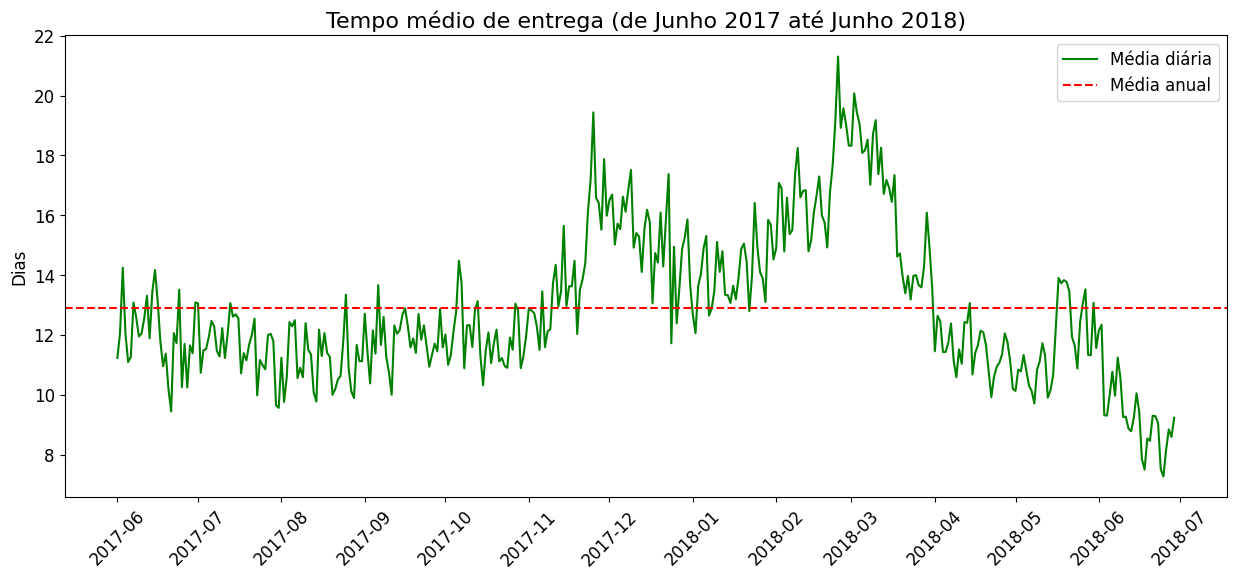

In [39]:
plt.figure(figsize=(15, 6))
plt.plot(pd.to_datetime(df['purchase_date']), df['avg_delivery_time'], label='Média diária', color='green')
plt.axhline(y=df['avg_delivery_time'].mean(), color='red', linestyle='--', label='Média anual')
plt.ylabel('Dias')
plt.title('Tempo médio de entrega (de Junho 2017 até Junho 2018)')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.legend()
plt.show()

Como podemos ver, há dois períodos em que o tempo de entrega foi significativamente maior que a média: dezembro de 2017 e fevereiro–março de 2018.

Os atrasos em dezembro provavelmente foram causados pelo movimento intenso das festas de fim de ano, enquanto os de fevereiro–março podem ter sido resultado das [greves](https://agenciabrasil.ebc.com.br/geral/noticia/2018-03/contra-mudancas-no-plano-de-saude-trabalhadores-dos-correios-fazem-ato-no-rio) dos correios que ocorreram em alguns estados do Brasil nesse período.

# Avaliações de pedidos

O banco de dados possui uma tabela de avaliações, onde os clientes atribuem notas de 1 a 5 e podem deixar comentários. Vamos ver as colunas usadas na análise.

In [40]:
view_table('order_reviews', 5).iloc[:, [1, 2, 4]]

,order_id,review_score,review_comment_message
0,73fc7af87114b39712e6da79b0a377eb,4,None
1,a548910a1c6147796b98fdf73dbeba33,5,None
2,f9e4b658b201a9f2ecdecbb34bed034b,5,None
3,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...


Vamos contar quantos pedidos tem para cada nota de aval:

In [41]:
review_score_count = """
SELECT
    review_score,
    COUNT(*) AS count
FROM order_reviews
GROUP BY review_score
"""
df = pd.read_sql_query(review_score_count, conn)
df

,review_score,count
0,1,11424
1,2,3151
2,3,8179
3,4,19142
4,5,57328


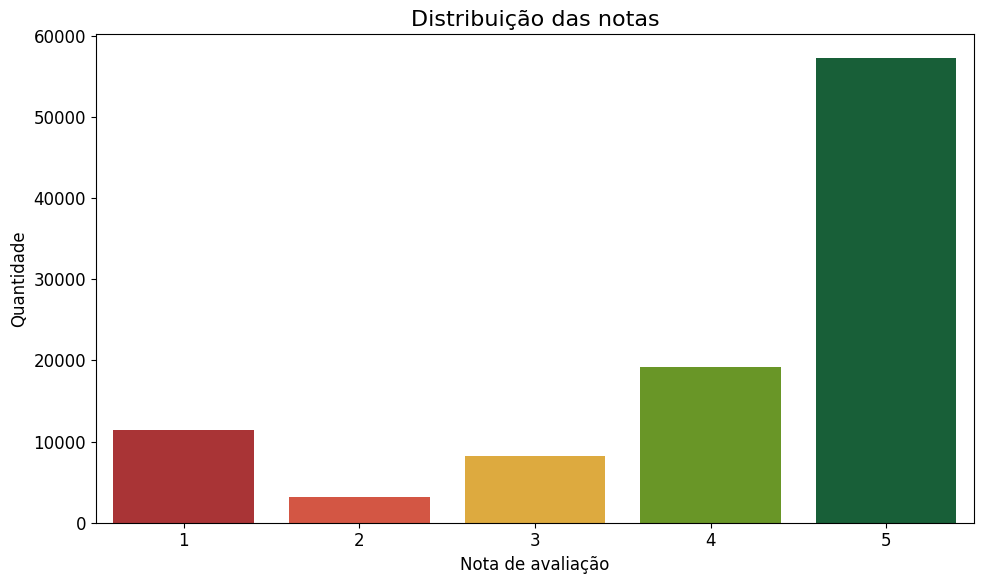

In [42]:
plt.figure(figsize=(10,6))
colors = ['#BC2023', '#EB442C', '#F8B324', '#6da814', '#0C6B37']
sns.barplot(x='review_score', y='count', data=df, hue='review_score', palette=colors, dodge=False)
plt.title('Distribuição das notas')
plt.xlabel('Nota de avaliação')
plt.ylabel('Quantidade')
plt.legend().remove()
plt.tight_layout()
plt.show()


Podemos observar que a maioria das avaliações são positivas, mas ainda há um número considerável de clientes insatisfeitos.

Para entender o motivo, vamos gerar uma nuvem de palavras com os comentários que receberam nota 1 ou 2, unindo todas as mensagens com a função GROUP_CONCAT do SQL

In [43]:
comments_negativos = """
SELECT GROUP_CONCAT(review_comment_message, ' ') AS comments
FROM order_reviews
WHERE review_score IN (1,2)
"""

comments_negativos_df = pd.read_sql(comments_negativos, conn)['comments'][0]
comments_negativos_df[:150]

'GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E ESSA COMPRA AGORA ME DECPCIONOU Péssimo Não gostei ! Comprei gato por lebre Sempre compro pela Internet'

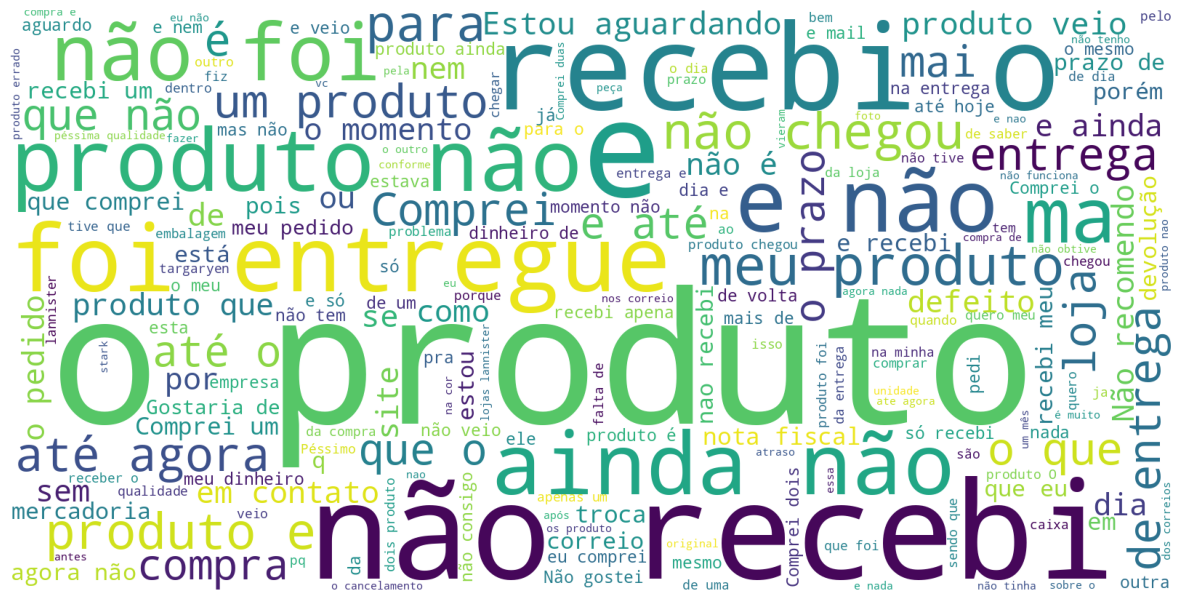

In [44]:
## gerando a nuvem de palavras
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(comments_negativos_df)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

A principal causa dos comentários negativos está relacionada a atrasos na entrega, enquanto a insatisfação com a qualidade do produto ou erros no pedido aparentam ser fatores secundários.

# Valor do tempo de vida do cliente

Valor do tempo de vida do cliente (LTV) é uma métrica que estima o valor total que um cliente trará ao longo do relacionamento com a empresa. Vamos calcular o LTV usando a tabela 'order_payments', que mostra os pagamentos e métodos utilizados.

In [45]:
view_table('order_payments', 5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Para começar, vamos calcular os componentes do LTV para cada cliente:

Frequência de Compra (FC): número de pedidos feitos pelo cliente.

Valor Médio do Pedido (VMP): total pago dividido pelo número de pedidos.

Tempo Médio de Vida do Cliente (TMVC): número de semanas entre o primeiro e o último pedido (mínimo de 1).

Para deixar o código mais claro, usaremos uma tabela comum para reunir os dados necessários e, em seguida, calcular cada componente do LTV na consulta principal.

In [46]:
cte = """
-- Criamos uma CTE (subquery nomeada) chamada CustomerData
-- Ela reúne os dados principais de cada cliente (pedidos, pagamentos e datas)
WITH CustomerData AS (
    SELECT
        customer_unique_id,
        customer_zip_code_prefix AS zip_code_prefix,
        COUNT(DISTINCT orders.order_id) AS order_count,
        SUM(payment_value) AS total_payment,
        JULIANDAY(MIN(order_purchase_timestamp)) AS first_order_day,
        JULIANDAY(MAX(order_purchase_timestamp)) AS last_order_day
    FROM customers
        JOIN orders USING (customer_id)
        JOIN order_payments USING (order_id)
    GROUP BY customer_unique_id
)

-- A partir da CTE, calculamos os indicadores de valor do cliente (CLV)
SELECT
    customer_unique_id,
    zip_code_prefix,
    order_count AS FC,
    total_payment / order_count AS VMP,
    CASE
     -- Se a diferença entre o primeiro e último pedido for menor que 7 dias, define o tempo mínimo como 1 semana
        WHEN (last_order_day - first_order_day) < 7 THEN 1
            -- Caso contrário, calcula o tempo médio de vida do cliente em semanas
        ELSE
            (last_order_day - first_order_day) / 7
        END AS TMVC -- Tempo médio de vida do cliente
FROM CustomerData
"""

pd.read_sql(cte, conn)

,customer_unique_id,zip_code_prefix,FC,VMP,TMVC
0,0000366f3b9a7992bf8c76cfdf3221e2,7787,1,141.90,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,1,27.19,1.0
2,0000f46a3911fa3c0805444483337064,88115,1,86.22,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,66812,1,43.62,1.0
4,0004aac84e0df4da2b147fca70cf8255,18040,1,196.89,1.0
...,...,...,...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,55250,1,2067.42,1.0
96091,fffea47cd6d3cc0a88bd621562a9d061,44054,1,84.58,1.0
96092,ffff371b4d645b6ecea244b27531430a,78552,1,112.46,1.0
96093,ffff5962728ec6157033ef9805bacc48,29460,1,133.69,1.0


Para criar um mapa da distribuição do LTV pelo Brasil, também precisamos adicionar a latitude e a longitude de cada prefixo do CEP, que podem ser encontradas na tabela 'geolocation'.

In [47]:
view_table('geolocation', 5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


sabe-se que CLV = FC × VMP × TMVC
onde:

FC = Frequência de compras (quantas vezes o cliente comprou)

VMP = Valor médio por pedido

TMVC = Tempo médio de vida do cliente

In [48]:
clv_por_cep = f"""
WITH CustomerData AS (
    SELECT
        customer_unique_id,
        customer_zip_code_prefix AS zip_code_prefix,
        COUNT(DISTINCT orders.order_id) AS FP, -- Frequência de compras
        SUM(payment_value) / COUNT(DISTINCT orders.order_id) AS VMP, -- Valor médio por pedido
        CASE
            WHEN (JULIANDAY(MAX(order_purchase_timestamp)) - JULIANDAY(MIN(order_purchase_timestamp))) < 7 THEN 1
            ELSE (JULIANDAY(MAX(order_purchase_timestamp)) - JULIANDAY(MIN(order_purchase_timestamp))) / 7
        END AS TMVC -- Tempo médio de vida do cliente (em semanas)
    FROM customers
        JOIN orders USING (customer_id)
        JOIN order_payments USING (order_id)
    GROUP BY customer_unique_id
),
CLVPorCEP AS (
    SELECT
        zip_code_prefix,
        AVG(FP * VMP * TMVC) AS CLV_medio,
        COUNT(*) AS numero_clientes
    FROM CustomerData
    GROUP BY zip_code_prefix
)
SELECT
    c.zip_code_prefix,
    c.CLV_medio,
    c.numero_clientes,
    g.geolocation_lat AS latitude,
    g.geolocation_lng AS longitude
FROM CLVPorCEP c
JOIN geolocation g
    ON c.zip_code_prefix = g.geolocation_zip_code_prefix
GROUP BY c.zip_code_prefix
"""

In [ ]:
df = pd.read_sql(clv_por_cep, conn)
print(df.columns)

Podemos criar um mapa usando a biblioteca folium do python!
https://realpython.com/python-folium-web-maps-from-data/

In [ ]:
import folium
import numpy as np

mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

for i, linha in df.iterrows():
    folium.CircleMarker(
        location=[linha['latitude'], linha['longitude']],
        radius=0.1 * np.sqrt(linha['numero_clientes']),
        color=None,
        fill_color='#85001d',
        fill_opacity=0.1 + 0.1 * np.sqrt(linha['CLV_medio'] / df['CLV_medio'].max()),
        popup=(
            f"<b>Prefixo CEP:</b> {int(linha['zip_code_prefix'])}<br>"
            f"<b>CLV Médio:</b> {linha['CLV_medio']:.2f}<br>"
            f"<b>Clientes:</b> {int(linha['numero_clientes'])}"
        )
    ).add_to(mapa)

mapa



Como podemos ver no mapa, a maior parte do valor dos clientes dos vendedores da Olist está concentrada no sudeste do Brasil, nas regiões mais populosas — principalmente no estado de São Paulo e nas áreas próximas às cidades do Rio de Janeiro e Belo Horizonte.

<br>

# Vendedores

vamos ver as primeiras linhas da tabela 'sellers'

In [49]:
view_table('sellers', 5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


como os vendedores são em sua maioria?
pequenos com poucas vendas ou grandes com alto volume? E como as avaliações variam entre eles?
Podemos responder a isso com um gráfico de dispersão talvez, usando dados da tabela 'sellers'.

In [50]:
# Consulta SQL para analisar a relação entre volume de vendas e pontuação média de avaliações dos vendedores
seller_review_scores_and_sales = '''
SELECT
    sellers.seller_id,  -- Identificador único de cada vendedor
    AVG(order_reviews.review_score) AS avg_review_score,  -- Média das notas de avaliação recebidas
    SUM(order_items.price) AS total_sales,                -- Soma total das vendas realizadas (receita bruta)
    COUNT(orders.order_id) AS num_orders                  -- Quantidade de pedidos feitos ao vendedor
FROM
    sellers
    -- Associa os itens de pedido para saber o que cada vendedor vendeu
    LEFT JOIN order_items ON sellers.seller_id = order_items.seller_id
    -- Conecta os pedidos para relacionar vendas e avaliações
    LEFT JOIN orders ON order_items.order_id = orders.order_id
    -- Junta as avaliações dos clientes aos pedidos
    LEFT JOIN order_reviews ON orders.order_id = order_reviews.order_id
GROUP BY
    sellers.seller_id  -- Agrupa as métricas por vendedor
HAVING
    COUNT(orders.order_id) > 10  -- Mantém apenas vendedores com mais de 10 pedidos (filtra outliers e dados irrelevantes)
'''

df = pd.read_sql_query(seller_review_scores_and_sales, conn)
df

,seller_id,avg_review_score,total_sales,num_orders
0,001cca7ae9ae17fb1caed9dfb1094831,3.902542,25080.03,239
1,002100f778ceb8431b7a1020ff7ab48f,3.982143,1254.40,56
2,004c9cd9d87a3c30c522c48c4fc07416,4.132948,20467.18,176
3,00720abe85ba0859807595bbf045a33b,3.653846,1007.50,26
4,00ee68308b45bc5e2660cd833c3f81cc,4.331395,20345.00,173
...,...,...,...,...
1310,ffc470761de7d0232558ba5e786e57b7,4.300000,1649.01,31
1311,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.250000,2101.20,20
1312,ffeee66ac5d5a62fe688b9d26f83f534,4.214286,1839.86,14
1313,fffd5413c0700ac820c7069d66d98c89,3.866667,9062.30,61


Podemos criar um gráfico de dispersão onde cada ponto representa um vendedor:
no eixo Y estará a média das avaliações dos pedidos, no eixo X, o total de vendas, exibido em escala logarítmica (já que a maioria vende pouco). Além disso, a cor e o tamanho dos pontos indicarão a quantidade de pedidos de cada vendedor.

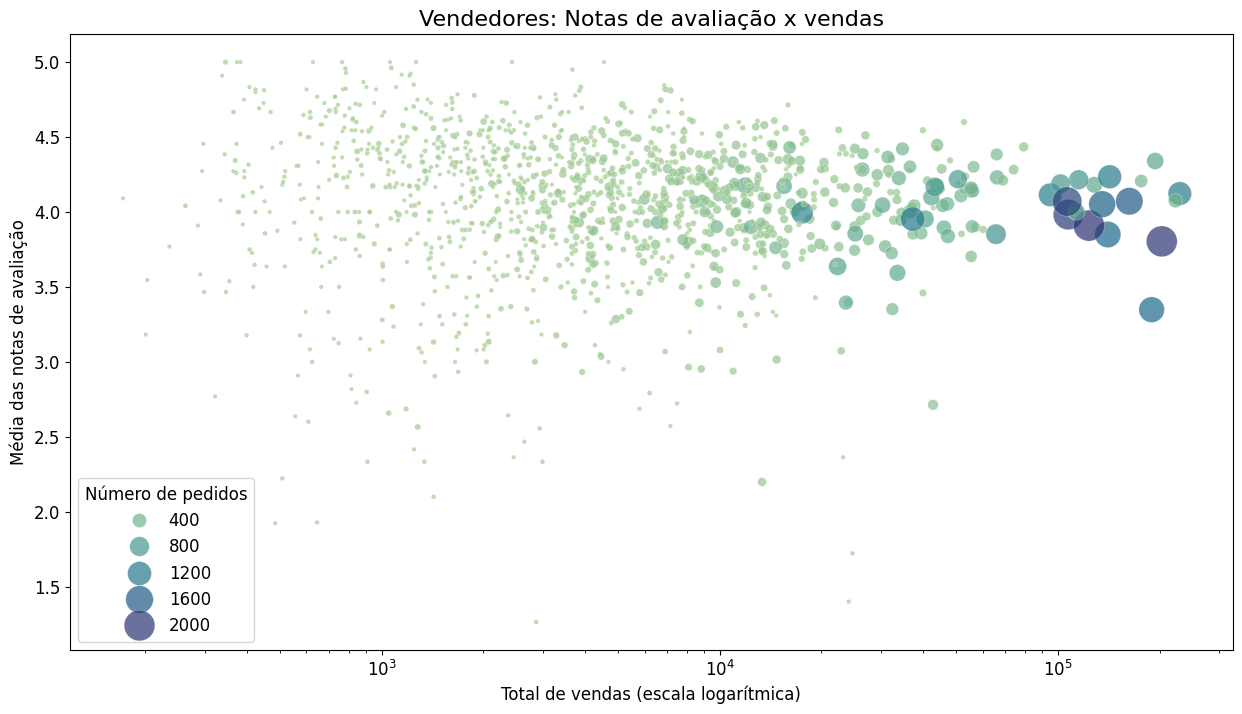

In [51]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='total_sales', y='avg_review_score', size='num_orders', sizes=(10, 500),
                hue='num_orders', palette="crest", alpha=0.7)
plt.xscale('log')
plt.xlabel('Total de vendas (escala logarítmica)')
plt.ylabel('Média das notas de avaliação')
plt.title('Vendedores: Notas de avaliação x vendas')
plt.legend(title='Número de pedidos')
plt.show()

A maioria dos vendedores da Olist é pequena, com poucas vendas.
Vendedores maiores têm avaliações mais estáveis, geralmente entre 3.5 e 4.5.
À direita do gráfico, destaca-se um grande vendedor (coloração mais roxa) com notas bem abaixo dos demais.

Também tem casos de vendedores com o mesmo total de vendas, mas com diferentes números de pedidos — indicando valores médios por pedido distintos.

Vamos tentar criar outro gráfico para entender melhor como os vendedores se distribuem pelo volume de pedidos.

Para isso, vamos agrupá-los em 4 categorias com base na quantidade total de pedidos enviados:

- Grupo 1: 1 a 9 pedidos
- Grupo 2: 10 a 99 pedidos
- Grupo 3: 100 a 999 pedidos
- Grupo 4: 1000 ou mais pedidos

In [52]:
vendedores_segmentados = """
SELECT
    seller_id,
    CASE
        WHEN COUNT(order_id) BETWEEN 1 AND 9 THEN '1-9 orders'
        WHEN COUNT(order_id) BETWEEN 10 AND 99 THEN '10-99 orders'
        WHEN COUNT(order_id) BETWEEN 100 AND 999 THEN '100-999 orders'
        ELSE '1000+ orders'
    END AS bucket
FROM order_items
GROUP BY seller_id
"""

pd.read_sql_query(vendedores_segmentados, conn).head(5)

,seller_id,bucket
0,0015a82c2db000af6aaaf3ae2ecb0532,1-9 orders
1,001cca7ae9ae17fb1caed9dfb1094831,100-999 orders
2,001e6ad469a905060d959994f1b41e4f,1-9 orders
3,002100f778ceb8431b7a1020ff7ab48f,10-99 orders
4,003554e2dce176b5555353e4f3555ac8,1-9 orders


In [53]:
vendedores_por_segmento = f"""
WITH VendedoresSegmentados AS (
    {vendedores_segmentados}
)
SELECT
    bucket,
    COUNT(seller_id) AS seller_count
FROM VendedoresSegmentados
GROUP BY bucket
"""

seller_buckets = pd.read_sql_query(vendedores_por_segmento, conn)
seller_buckets


,bucket,seller_count
0,1-9 orders,1714
1,10-99 orders,1142
2,100-999 orders,226
3,1000+ orders,13


Vamos visualizar o df.

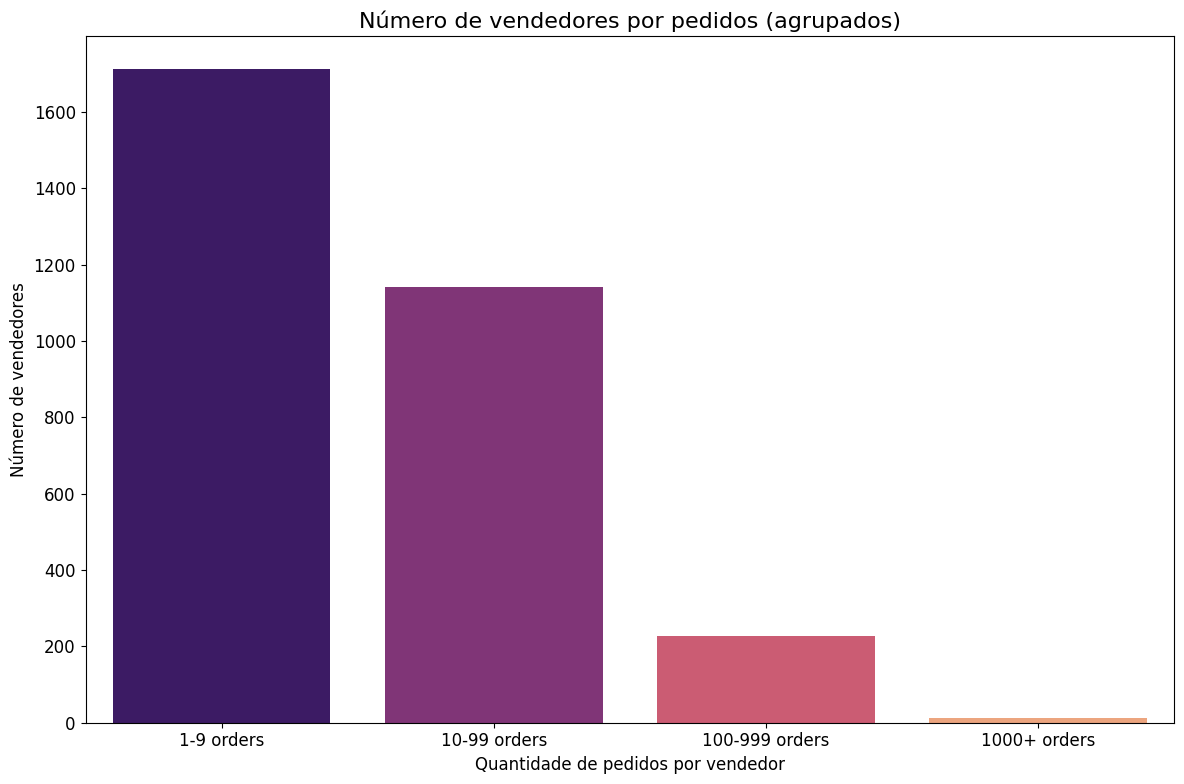

In [54]:
plt.figure(figsize=(12, 8))
sns.barplot(x='bucket', y='seller_count', data=seller_buckets, hue='bucket', palette="magma", dodge=False)
plt.title('Número de vendedores por pedidos (agrupados)')
plt.xlabel('Quantidade de pedidos por vendedor')
plt.ylabel('Número de vendedores')
plt.tight_layout()
plt.show()

Pode-se concluir que a maioria dos vendedores apresentam poucos pedidos (1 a 9 pedidos), e poucos vendedores ultrampassam 1000 pedidos, que é um valor alto de pedidos.


- Os grandes vendedores têm tempos de envio menores?
- Para responder a essa pergunta, vamos tentar criar um gráfico com a distribuição do tempo de envio para cada um dos quatro grupos anteriores.
- Vamos reutilizar a tabela anterior na consulta para obter os dados necessários.

In [55]:
tempos_envio_vendedores = f"""
-- Criamos uma CTE (tabela temporária) chamada 'VendedoresSegmentados'
-- que reutiliza a query anterior, onde os vendedores foram agrupados
-- em faixas (1-9 pedidos, 10-99, 100-999, 1000+)
WITH VendedoresSegmentados AS (
    {vendedores_segmentados}
)

-- Agora selecionamos os dados principais que queremos analisar

SELECT
    bucket,
    VendedoresSegmentados.seller_id,
    -- Calculamos o tempo de entrega em dias:
    -- diferença entre a data de entrega ao cliente e a data da compra
    JULIANDAY(order_delivered_customer_date) - JULIANDAY(order_purchase_timestamp) AS delivery_time
FROM orders
    -- Relacionamos a tabela de pedidos com os itens de pedido
    JOIN order_items USING (order_id)
    -- Ligamos também à tabela 'VendedoresSegmentados' para trazer o grupo de cada vendedor
    JOIN VendedoresSegmentados USING (seller_id)
WHERE order_status = 'delivered'
"""

df = pd.read_sql_query(tempos_envio_vendedores, conn)
df

,bucket,seller_id,delivery_time
0,10-99 orders,3504c0cb71d7fa48d967e0e4c94d59d9,8.436574
1,100-999 orders,289cdb325fb7e7f891c38608bf9e0962,13.782037
2,1000+ orders,4869f7a5dfa277a7dca6462dcf3b52b2,9.394213
3,100-999 orders,66922902710d126a0e7d26b0e3805106,13.208750
4,100-999 orders,2c9e548be18521d1c43cde1c582c6de8,2.873877
...,...,...,...
110192,10-99 orders,1f9ab4708f3056ede07124aad39a2554,22.193727
110193,10-99 orders,d50d79cb34e38265a8649c383dcffd48,24.859421
110194,100-999 orders,a1043bafd471dff536d0c462352beb48,17.086424
110195,100-999 orders,a1043bafd471dff536d0c462352beb48,17.086424


Vamos criar quatro boxplots, correspondendo a cada grupo mostrado no gráfico anterior.

/tmp/ipython-input-2481636999.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


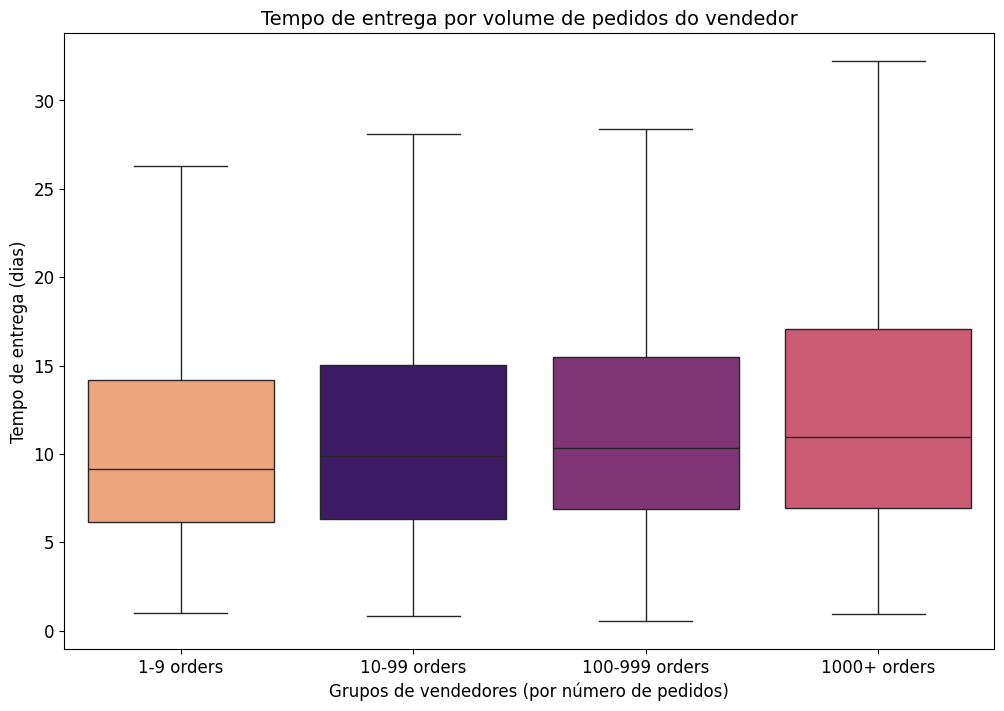

In [56]:
plt.figure(figsize=(12, 8))

# Cria uma paleta de cores com base no número de grupos de vendedores
palette = sns.color_palette('magma', len(seller_buckets['bucket'].unique()))

# Garante que a ordem dos grupos siga a ordem da variável 'bucket'
ordem_buckets = seller_buckets['bucket'].unique()

# Cria os boxplots com as cores e ajustes visuais
sns.boxplot(
    x='bucket',
    y='delivery_time',
    data=df,
    order=ordem_buckets,
    showfliers=False,   # remove outliers para um gráfico mais limpo
    hue='bucket',
    palette=palette,
    dodge=False
)

plt.title('Tempo de entrega por volume de pedidos do vendedor', fontsize=14)
plt.xlabel('Grupos de vendedores (por número de pedidos)', fontsize=12)
plt.ylabel('Tempo de entrega (dias)', fontsize=12)
plt.legend().remove()
plt.show()


Por algum motivo, quanto maior o vendedor, mais demoradas tendem a ser as entregas.

Um análise futura pode ser a seguinte:
- O que causa esse aumento no tempo de envio?
- Será que os vendedores menores demoram menos entre a aprovação do pedido e a entrega do pacote à transportadora?

<br>

# Conclusão do projeto

Este projeto demonstrou como é possível conduzir uma análise completa de e-commerce utilizando apenas SQL para manipulação e exploração dos dados, com Python aplicado à visualização e storytelling dos resultados. A abordagem evidenciou o poder das CTEs, joins e funções agregadas do SQL em conjunto com as bibliotecas pandas, matplotlib, seaborn e folium para transformar dados brutos em insights acionáveis.


A análise do dataset da Olist revelou padrões claros de comportamento e performance:

  📈 Crescimento constante nas vendas, com picos notáveis em dezembro, impulsionados pelas compras de Natal.

  ⏰ Maior volume de pedidos entre 10h e 16h nos dias úteis, reforçando a importância de campanhas matinais.

  🏙️ Concentração de vendas nas grandes capitais, especialmente São Paulo e Rio de Janeiro, refletindo densidade populacional e poder de compra.

  💸 Pedidos com valor médio em torno de R$160, predominando produtos leves e de ticket baixo.

  🧴 Categorias como “Beleza e Saúde” e “Informática” lideram em volume de vendas e crescimento ao longo do tempo.

  🚚 Diferenças logísticas significativas entre cidades, com prazos de entrega maiores fora do eixo Sudeste.

  ⭐ Predomínio de avaliações positivas, mas com recorrentes reclamações sobre atrasos na entrega.

  💰 Valor do Tempo de Vida do Cliente (LTV) concentrados no Sudeste, indicando regiões prioritárias para retenção e marketing.

  🧾 Maioria dos vendedores é composta por pequenos lojistas, enquanto grandes vendedores, curiosamente, possuem prazos de entrega mais longos.

Além dos resultados, o projeto reforça minha capacidade de:

- Estruturar pipelines analíticos em SQL com CTEs reutilizáveis e lógicas otimizadas;

- Traduzir consultas complexas em visualizações claras e interpretáveis;

- Gerar insights estratégicos orientados a negócio — do comportamento de compra à eficiência operacional.

Em resumo, este estudo combinou raciocínio analítico, domínio técnico e storytelling de dados, transformando o banco da Olist em uma narrativa visual e prática — exatamente o tipo de trabalho que une análise, negócios e impacto real.